# Excersize 3.1(Random Ballistic Deposition)

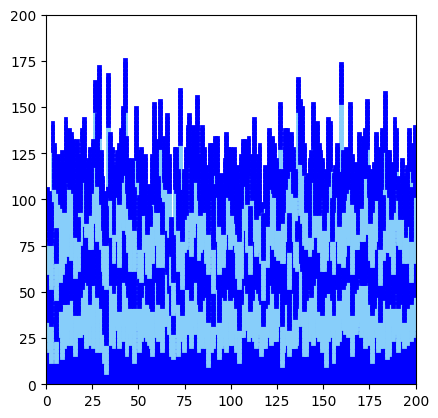

       average_height  average_roughness
1                0.00           0.000000
2                0.01           0.141067
3                0.02           0.198997
4                0.03           0.243105
5                0.04           0.280000
...               ...                ...
12496          124.95          17.325054
12497          124.96          17.326234
12498          124.97          17.325100
12499          124.98          17.326269
12500          124.99          17.336663

[12500 rows x 2 columns]
Slope: 0.0011505027088269976
Intercept: 4.167863416198074
Predicted y: [ 4.16901392  4.17016442  4.17131492 ... 18.54684627 18.54799677
 18.54914728]


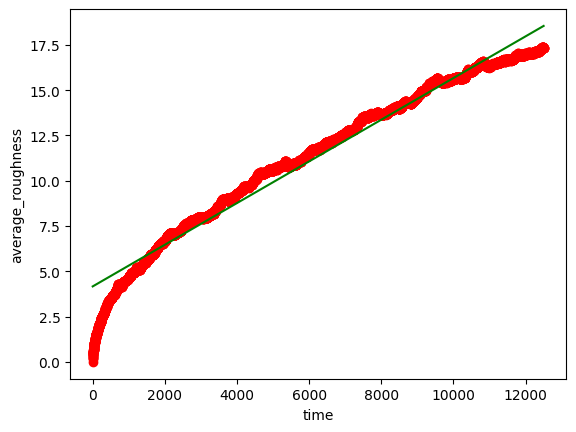

average error =  6.631540861963145
B = 1


In [22]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import matplotlib.patches as patches  # Importing patches for drawing rectangles
import numpy as np  # Importing NumPy for numerical operations
from math import sqrt  # Importing sqrt function for square root calculations
import pandas as pd  # Importing Pandas for data handling
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from scikit-learn
from math import log  # Importing log function for logarithmic calculations

# Creating a figure and axis for the plot
fig, ax = plt.subplots()
ax.set_xlim(0, 200)  # Setting x-axis limits
ax.set_ylim(0, 200)  # Setting y-axis limits
ax.set_aspect('equal')  # Ensuring equal aspect ratio for the plot

A = []  # List to store placed rectangles
H, W = [], []  # Lists to store height and roughness data
B = ['blue', 'lightskyblue']  # Colors for rectangles

# Loop to generate 12500 rectangles
for i in range(12500):
    x = np.random.randint(0, 200)  # Random x-coordinate for rectangle
    j = 0  # Initial y-coordinate
    while [x, j] in A:  # Ensure no overlapping by adjusting y
        j += 2
    A.reverse()  # Reverse A for calculations
    
    # Compute average height and roughness
    h = 0
    h_2 = 0
    for l in range(0, 200):
        for m in A:
            if m[0] == l:
                h += (m[1] + 2)
                h_2 += pow(m[1] + 2, 2)
                break
    Av = h / 200  # Average height
    Bv = h_2 / 200  # Average squared height
    H.append(Av)  # Store average height
    W.append(sqrt(abs(Bv - pow(Av, 2))))  # Store standard deviation (roughness)
    
    A.reverse()  # Reverse A back
    A.append([x, j])  # Add new rectangle position
    k = i // 2500  # Determine color index
    
    # Draw rectangle with appropriate color
    if k % 2 == 0:
        square = patches.Rectangle([x, j], 1, 2, edgecolor=B[0], facecolor=B[0], linewidth=2)
    else:
        square = patches.Rectangle([x, j], 1, 2, edgecolor=B[1], facecolor=B[1], linewidth=2)
    ax.add_patch(square)

plt.show()  # Display the plot

# Create index and y values for analysis
index, y = [], []
for o in range(12500):
    index.append(str(o + 1))
for p in range(12500):
    y.append(p + 1)

# Print DataFrame of average height and roughness
print(pd.DataFrame({'average_height': H, 'average_roughness': W}, index=index))

# Scatter plot of roughness over time
plt.scatter(y, W, color='red', marker='o', label="Data points")
plt.xlabel("time")
plt.ylabel("average_roughness")

# Convert lists to NumPy arrays for linear regression
y = np.array(y).reshape(-1, 1)
W = np.array(W)

# Perform linear regression
model = LinearRegression()
model.fit(y, W)
print("Slope:", model.coef_[0])  # Print slope
print("Intercept:", model.intercept_)  # Print intercept

y_pred = model.predict(y)  # Predicted values from the model
print("Predicted y:", y_pred)

# Plot regression line
plt.plot(y, y_pred, label="Sklearn Linear Regression", linestyle='solid', color='green')
plt.show()

# Compute average error rate
error_rate = 0
for Q in range(len(W)):
    if W[Q] != 0:
        error_rate += abs(W[Q] - y_pred[Q]) / W[Q]
    else:
        error_rate += abs(W[Q] - y_pred[Q]) / y_pred[Q]
error_rate = error_rate / 200
print('average error = ', error_rate)  # Print average error
print("B = 1")  # Print final message

# Excersize 3.2( Ballistic Deposition with Relaxation)

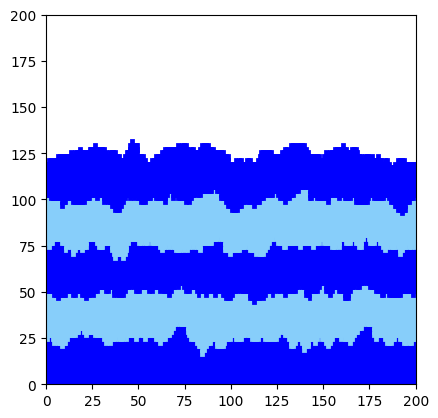

       average_height  average_roughness
1                0.00           0.000000
2                0.01           0.141067
3                0.02           0.198997
4                0.03           0.243105
5                0.04           0.280000
...               ...                ...
12496          124.94           3.136304
12497          124.95           3.123700
12498          124.96           3.136622
12499          124.97           3.136734
12500          124.98           3.143183

[12500 rows x 2 columns]
Slope: 0.08861862636501545
Intercept: 0.49224011165352044
Predicted y: [0.49224011 0.55366586 0.58959762 ... 1.32820832 1.32821541 1.3282225 ]


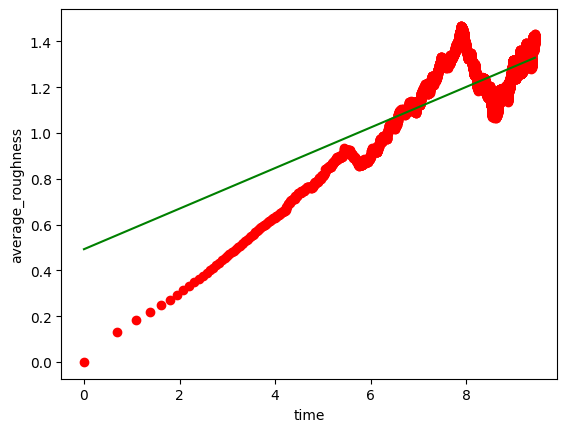

average error =  3.940807405624846
B =  0.42264602148939173
Z =  1.4903185412164195
a = 0.6298772021969937


In [23]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import matplotlib.patches as patches  # Importing patches for drawing rectangles
import numpy as np  # Importing NumPy for numerical operations
from math import sqrt, log, e  # Importing math functions
import pandas as pd  # Importing Pandas for data handling
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from scikit-learn

# Creating a figure and axis for the plot
fig, ax = plt.subplots()
ax.set_xlim(0, 200)  # Setting x-axis limits
ax.set_ylim(0, 200)  # Setting y-axis limits
ax.set_aspect('equal')  # Ensuring equal aspect ratio for the plot

A = []  # List to store placed rectangles
H, W = [], []  # Lists to store height and roughness data
B = ['blue', 'lightskyblue']  # Colors for rectangles

# Loop to generate 12500 rectangles
for i in range(12500):
    x = np.random.randint(0, 200)  # Random x-coordinate for rectangle
    j = 0  # Initial y-coordinate
    while [x, j] in A:  # Ensure no overlapping by adjusting y
        j += 2
    A.reverse()  # Reverse A for calculations
    
    # Compute average height and roughness
    h = 0
    h_2 = 0
    for l in range(0, 200):
        for m in A:
            if m[0] == l:
                h += (m[1] + 2)
                h_2 += pow(m[1] + 2, 2)
                break
    Av = h / 200  # Average height
    Bv = h_2 / 200  # Average squared height
    H.append(Av)  # Store average height
    W.append(sqrt(abs(Bv - pow(Av, 2))))  # Store standard deviation (roughness)
    
    A.reverse()  # Reverse A back
    
    # Determine neighboring heights
    T, Z = -2, -2
    g = -1
    while g > -1 * len(A):
        if A[g][0] == (x + 1) % 200:
            T = A[g][1]
            break
        g -= 1
    f = -1
    while f > -1 * len(A):
        if A[f][0] == (x - 1) % 200:
            Z = A[f][1]
            break
        f -= 1
    
    # Determine where to place new rectangles
    if ((T - (j - 2)) < 0) and (T - (j - 2) <= (Z - (j - 2))):
        A.append([(x + 1) % 200, T + 2])
    elif ((Z - (j - 2)) < 0) and ((Z - (j - 2)) < (T - (j - 2))):
        A.append([(x - 1) % 200, Z + 2])
    else:
        A.append([x, j])
    
    k = i // 2500  # Determine color index
    square = patches.Rectangle(A[-1], 1, 2, edgecolor=B[k % 2], facecolor=B[k % 2], linewidth=2)
    ax.add_patch(square)

plt.show()  # Display the plot

# Create index and y values for analysis
index, y = [], []
for o in range(12500):
    index.append(str(o + 1))
for p in range(12500):
    y.append(log(p + 1))

# Print DataFrame of average height and roughness
print(pd.DataFrame({'average_height': H, 'average_roughness': W}, index=index))

# Apply logarithm to roughness values
W2 = [log(i + 1) for i in W]

# Scatter plot of roughness over time
plt.scatter(y, W2, color='red', marker='o', label="Data points")
plt.xlabel("time")
plt.ylabel("average_roughness")

# Convert lists to NumPy arrays for linear regression
y = np.array(y).reshape(-1, 1)
W2 = np.array(W2)

# Perform linear regression
model = LinearRegression()
model.fit(y, W2)
print("Slope:", model.coef_[0])  # Print slope
print("Intercept:", model.intercept_)  # Print intercept

y_pred = model.predict(y)  # Predicted values from the model
print("Predicted y:", y_pred)

# Plot regression line
plt.plot(y, y_pred, label="Sklearn Linear Regression", linestyle='solid', color='green')
plt.show()

# Compute average error rate
error_rate = sum(abs(W2[i] - y_pred[i]) / (W2[i] if W2[i] != 0 else y_pred[i]) for i in range(len(W2))) / 200
print('average error = ', error_rate)  # Print average error

# Compute scaling exponents
W_S = pow(e, max(W))
t_S = pow(e, y[W.index(max(W))][0])
L = 200
print("B = ", log(W_S, t_S))
print("Z = ", log(t_S, L))
print('a =', log(W_S, t_S) * log(t_S, L))

# Excersize 3.3( Ballistic lateral Deposition with a line)

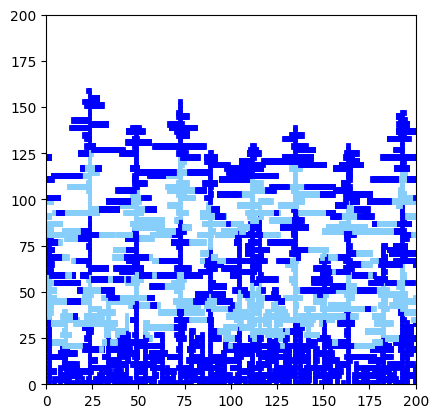

       average_height  average_roughness
1                0.00           0.000000
2                0.01           0.141067
3                0.02           0.198997
4                0.03           0.243105
5                0.04           0.280000
...               ...                ...
12496          128.94          12.132452
12497          128.99          12.206552
12498          128.99          12.206552
12499          129.05          12.240813
12500          129.06          12.232596

[12500 rows x 2 columns]
Slope: 0.3037683868425451
Intercept: -0.3890900568964044
Predicted y: [-0.38909006 -0.17853386 -0.05536637 ...  2.47645553  2.47647983
  2.47650414]


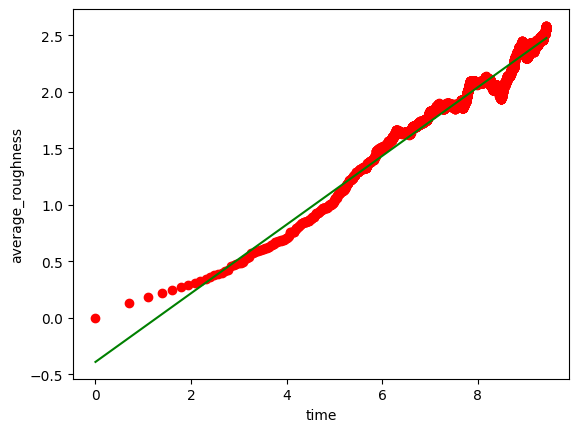

average error =  1.8042017596640736
B =  1.2976029633836643
Z =  1.7804527866997668
a = 2.310320812186321


In [24]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import matplotlib.patches as patches  # Importing patches for drawing rectangles
import numpy as np  # Importing NumPy for numerical operations
from math import sqrt, log, e  # Importing math functions
import pandas as pd  # Importing Pandas for data handling
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from scikit-learn

# Creating a figure and axis for the plot
fig, ax = plt.subplots()
ax.set_xlim(0, 200)  # Setting x-axis limits
ax.set_ylim(0, 200)  # Setting y-axis limits
ax.set_aspect('equal')  # Ensuring equal aspect ratio for the plot

A = []  # List to store placed rectangles
H, W = [], []  # Lists to store height and roughness data
B = ['blue', 'lightskyblue']  # Colors for rectangles

# Loop to generate 12500 rectangles
for i in range(12500):
    x = np.random.randint(0, 200)  # Random x-coordinate for rectangle
    j = 0  # Initial y-coordinate
    while [x, j] in A:  # Ensure no overlapping by adjusting y
        j += 2
    A.reverse()  # Reverse A for calculations
    
    # Compute average height and roughness
    h = 0
    h_2 = 0
    for l in range(0, 200):
        for m in A:
            if m[0] == l:
                h += (m[1] + 2)
                h_2 += pow(m[1] + 2, 2)
                break
    Av = h / 200  # Average height
    Bv = h_2 / 200  # Average squared height
    H.append(Av)  # Store average height
    W.append(sqrt(abs(Bv - pow(Av, 2))))  # Store standard deviation (roughness)
    
    A.reverse()  # Reverse A back
    
    # Determine neighboring heights
    T, Z = -2, -2
    g = -1
    while g > -1 * len(A):
        if A[g][0] == (x + 1) % 200:
            T = A[g][1]
            break
        g -= 1
    f = -1
    while f > -1 * len(A):
        if A[f][0] == (x - 1) % 200:
            Z = A[f][1]
            break
        f -= 1
    
    # Determine max height for new placement
    D = max(T, Z, j)
    A.append([x, D])
    
    k = i // 2500  # Determine color index
    square = patches.Rectangle([x, D], 1, 2, edgecolor=B[k % 2], facecolor=B[k % 2], linewidth=2)
    ax.add_patch(square)

plt.show()  # Display the plot

# Create index and y values for analysis
index, y = [], []
for o in range(12500):
    index.append(str(o + 1))
for p in range(12500):
    y.append(log(p + 1))

# Print DataFrame of average height and roughness
print(pd.DataFrame({'average_height': H, 'average_roughness': W}, index=index))

# Apply logarithm to roughness values
W2 = [log(i + 1) for i in W]

# Scatter plot of roughness over time
plt.scatter(y, W2, color='red', marker='o', label="Data points")
plt.xlabel("time")
plt.ylabel("average_roughness")

# Convert lists to NumPy arrays for linear regression
y = np.array(y).reshape(-1, 1)
W2 = np.array(W2)

# Perform linear regression
model = LinearRegression()
model.fit(y, W2)
print("Slope:", model.coef_[0])  # Print slope
print("Intercept:", model.intercept_)  # Print intercept

y_pred = model.predict(y)  # Predicted values from the model
print("Predicted y:", y_pred)

# Plot regression line
plt.plot(y, y_pred, label="Sklearn Linear Regression", linestyle='solid', color='green')
plt.show()

# Compute average error rate
error_rate = sum(abs(W2[i] - y_pred[i]) / (W2[i] if W2[i] != 0 else y_pred[i]) for i in range(len(W2))) / 200
print('average error = ', error_rate)  # Print average error

# Compute scaling exponents
W_S = pow(e, max(W))
t_S = pow(e, y[W.index(max(W))][0])
L = 200
print("B = ", log(W_S, t_S))
print("Z = ", log(t_S, L))
print('a =', log(W_S, t_S) * log(t_S, L))


# Excersize 3.4( Ballistic lateral Deposition with a starting point)

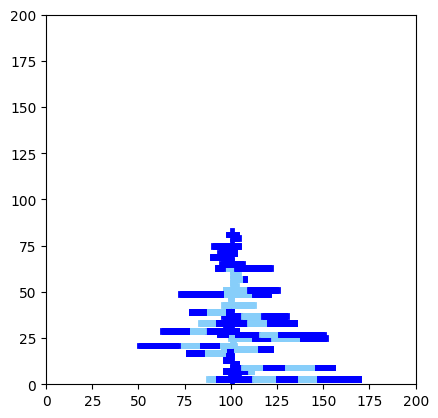

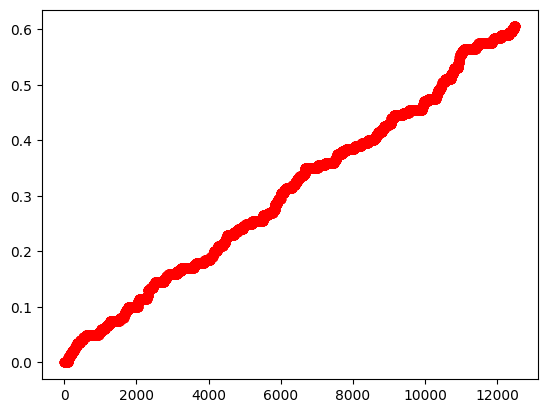

In [25]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import matplotlib.patches as patches  # Importing patches for drawing rectangles
import numpy as np  # Importing NumPy for numerical operations
from math import sqrt, log  # Importing math functions
import pandas as pd  # Importing Pandas for data handling
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from scikit-learn
import random  # Importing random module

# Creating a figure and axis for the plot
fig, ax = plt.subplots()
ax.set_xlim(0, 200)  # Setting x-axis limits
ax.set_ylim(0, 200)  # Setting y-axis limits
ax.set_aspect('equal')  # Ensuring equal aspect ratio for the plot

A = []  # List to store placed rectangles
H, W = [], []  # Lists to store height and roughness data
distance = []  # List to store distance calculations
B = ['blue', 'lightskyblue']  # Colors for rectangles
random_list = [100]  # Initialize list with a starting value

# Loop to generate 12500 rectangles
for i in range(12500):
    distance.append((max(random_list) - min(random_list)) / 200)  # Compute distance metric
    
    # Update random_list with new x-coordinates from A
    for d in A:
        if d[0] not in random_list:
            random_list.append(d[0])
        if d[0] + 1 not in random_list:
            random_list.append(d[0] + 1)
        if d[0] - 1 not in random_list:
            random_list.append(d[0] - 1)
    
    x = np.random.randint(0, 200)  # Random x-coordinate for rectangle
    
    if x in random_list:  # Ensure x is in the random_list
        j = 0  # Initial y-coordinate
        while [x, j] in A:  # Ensure no overlapping by adjusting y
            j += 2
        A.reverse()  # Reverse A for calculations
        
        # Compute average height and roughness
        h = 0
        h_2 = 0
        for l in range(0, 200):
            for m in A:
                if m[0] == l:
                    h += (m[1] + 2)
                    h_2 += pow(m[1] + 2, 2)
                    break
        Av = h / 200  # Average height
        Bv = h_2 / 200  # Average squared height
        H.append(Av)  # Store average height
        W.append(sqrt(abs(Bv - pow(Av, 2))))  # Store standard deviation (roughness)
        
        A.reverse()  # Reverse A back
        
        # Determine neighboring heights
        T, Z = -2, -2
        g = -1
        while g > -1 * len(A):
            if A[g][0] == (x + 1) % 200:
                T = A[g][1]
                break
            g -= 1
        f = -1
        while f > -1 * len(A):
            if A[f][0] == (x - 1) % 200:
                Z = A[f][1]
                break
            f -= 1
        
        # Determine max height for new placement
        D = max(T, Z, j)
        A.append([x, D])
        
        k = i // 2500  # Determine color index
        square = patches.Rectangle([x, D], 1, 2, edgecolor=B[k % 2], facecolor=B[k % 2], linewidth=2)
        ax.add_patch(square)
    else:
        continue  # Skip iteration if x is not in random_list

plt.show()  # Display the plot

y = []  # List to store time values
for p in range(12500):
    y.append(p)

# Scatter plot of distance over time
plt.scatter(y, distance, color='red', marker='o', label="Data points")
plt.show()


# Excersize 3.5( Ballistic competetive Deposition )

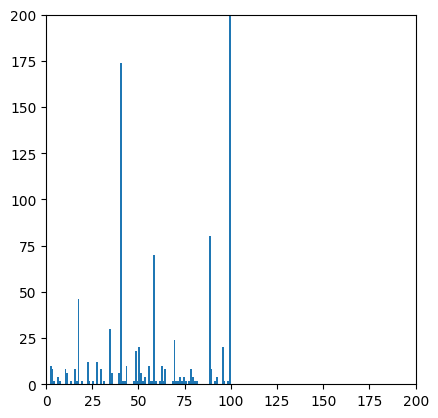

In [26]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import matplotlib.patches as patches  # Importing patches for drawing rectangles
import numpy as np  # Importing NumPy for numerical operations
from math import sqrt, log  # Importing math functions
import pandas as pd  # Importing Pandas for data handling
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from scikit-learn
import random  # Importing random module

# Creating a figure and axis for the plot
fig, ax = plt.subplots()
ax.set_xlim(0, 200)  # Setting x-axis limits
ax.set_ylim(0, 200)  # Setting y-axis limits
ax.set_aspect('equal')  # Ensuring equal aspect ratio for the plot

A = []  # List to store placed rectangles

# Loop to generate 4000 rectangles
for i in range(4000):
    x = np.random.randint(100, 200)  # Random x-coordinate between 100 and 200
    y = 200  # Initial y-coordinate
    b = 1  # Flag variable
    
    # Loop to move x and y while checking placement
    while x >= 0 and y >= 0:
        if [x, y] in A:  # If the position is already occupied
            b = -1  # Mark as occupied
            a = -1  # Initialize index variable
            
            # Search for the last placed block in the same column
            while a >= -1 * len(A):
                if A[a][0] == x:
                    square = patches.Rectangle([x, A[a][1] + 2], 1, 2)  # Create a new block on top
                    A.append([x, A[a][1] + 2])  # Add new block position
                    ax.add_patch(square)  # Add block to the plot
                    x = -10  # Exit the loop
                    break
                else:
                    a = a - 1  # Move to the previous element
        else:
            x = x - 1  # Move left
            y = y - 2  # Move down
    
    if b == 1:  # If the block is not placed yet
        if x >= 0:
            square = patches.Rectangle([x + 1, y + 2], 1, 2)  # Create a new block
            A.append([x + 1, y + 2])  # Store the block position
            ax.add_patch(square)  # Add block to the plot

plt.show()  # Display the plot